<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4662 entries, 0 to 4661
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4662 non-null   object 
 1   High       4662 non-null   float64
 2   Low        4662 non-null   float64
 3   Open       4662 non-null   float64
 4   Close      4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      4662 non-null   float64
dtypes: float64(6), object(1)
memory usage: 255.1+ KB


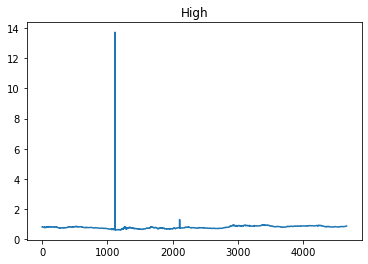

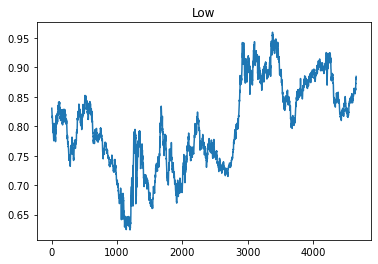

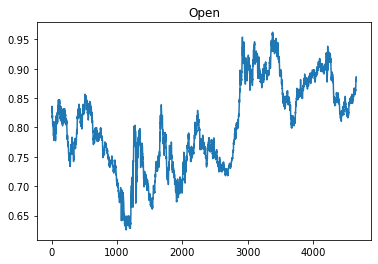

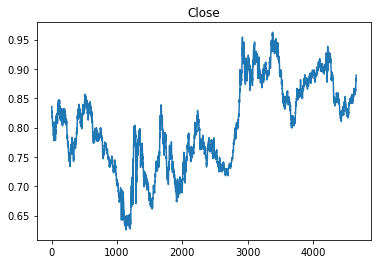

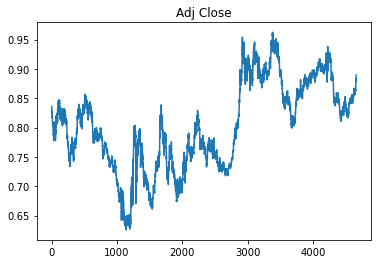

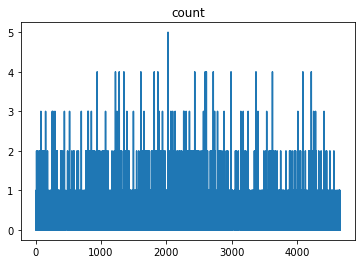

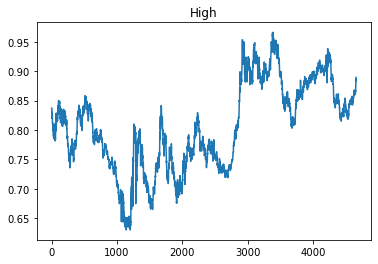

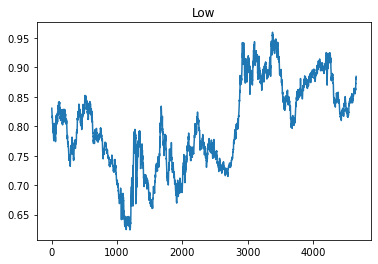

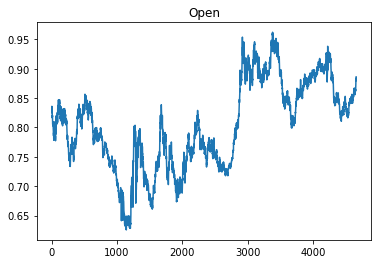

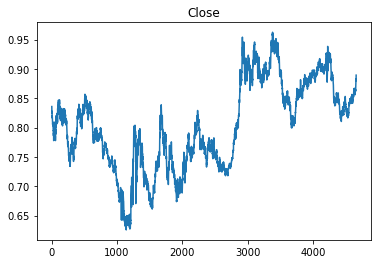

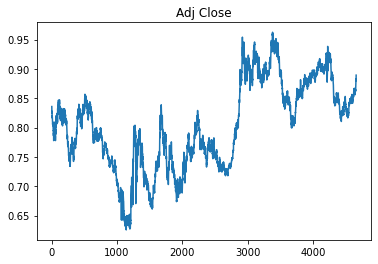

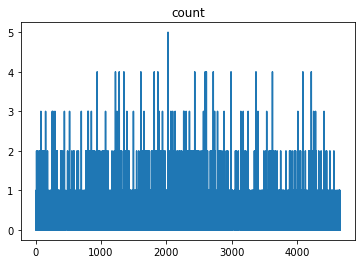

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data_collection/data.csv")


df.drop("Volume",1,inplace=True)

df.info()

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()
    

df.drop(df[df.High > 1].index, inplace=True)

for i in df.columns[1:]:
    df[i].plot()
    plt.title(i)
    plt.show()

In [2]:
df2 = df.drop(["Date", "Adj Close", "count"],1)

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4660 non-null   float64
 1   Low     4660 non-null   float64
 2   Open    4660 non-null   float64
 3   Close   4660 non-null   float64
dtypes: float64(4)
memory usage: 182.0 KB


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()

In [6]:

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [7]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4600, 20, 4).
trainY shape == (4600, 1).


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional

In [9]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
es_callback = EarlyStopping(monitor="loss", patience=10)

In [11]:
history = model.fit(trainX, trainY, epochs=150, batch_size=50)

Epoch 1/150
92/92 [==============================] - 2s 9ms/step - loss: 0.1196
Epoch 2/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0170
Epoch 3/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0145
Epoch 4/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0120
Epoch 5/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0114
Epoch 6/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 7/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0109
Epoch 8/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 9/150
92/92 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 10/150
92/92 [==============================] - 1s 10ms/step - loss: 0.0094
Epoch 11/150
92/92 [==============================] - 1s 10ms/step - loss: 0.0088
Epoch 12/150
92/92 [==============================] - 1s 10ms/step - loss: 0.0086
Epoch 13/150
92/92 [==============

92/92 [==============================] - 1s 10ms/step - loss: 1.8397e-04
Epoch 99/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8765e-04
Epoch 100/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8784e-04
Epoch 101/150
92/92 [==============================] - 1s 10ms/step - loss: 2.0057e-04
Epoch 102/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8006e-04
Epoch 103/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8626e-04
Epoch 104/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8040e-04
Epoch 105/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8978e-04
Epoch 106/150
92/92 [==============================] - 1s 10ms/step - loss: 1.9167e-04
Epoch 107/150
92/92 [==============================] - 1s 10ms/step - loss: 1.8957e-04
Epoch 108/150
92/92 [==============================] - 1s 10ms/step - loss: 1.9569e-04
Epoch 109/150
92/92 [==============================] - 1s 

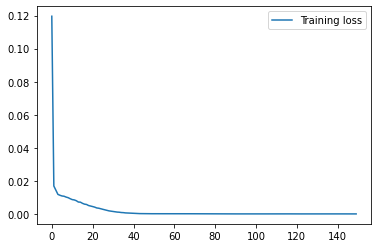

In [12]:
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [13]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (20, 20, 4).
testY shape == (20, 1).


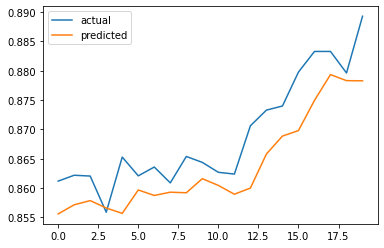

In [14]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))

In [15]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [17]:
print(f"""n_past = {n_past} \nmse without count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse without count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs without count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

n_past = 20 
mse without count 3.817654584405972e-05 
      
rmse without count 0.006178717168155516
      
meanabs without count 0.005319371819496155


In [18]:
df2 = df.drop(["Date", "Adj Close",],1)

In [19]:

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

In [20]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (4600, 20, 5).
trainY shape == (4600, 1).


In [21]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 64)            17920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(trainX, trainY, epochs=150, batch_size=40)

Epoch 1/150
115/115 [==============================] - 2s 9ms/step - loss: 0.0719
Epoch 2/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0134
Epoch 3/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0127
Epoch 4/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 5/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0103
Epoch 6/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 7/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0093
Epoch 8/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0082
Epoch 9/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 10/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0073
Epoch 11/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0067
Epoch 12/150
115/115 [==============================] - 1s 9ms/step - loss: 0.0062
Epoch 13/150


115/115 [==============================] - 1s 9ms/step - loss: 2.2659e-04
Epoch 97/150
115/115 [==============================] - 1s 9ms/step - loss: 2.3560e-04
Epoch 98/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2867e-04
Epoch 99/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2924e-04
Epoch 100/150
115/115 [==============================] - 1s 9ms/step - loss: 2.3792e-04
Epoch 101/150
115/115 [==============================] - 1s 9ms/step - loss: 2.3818e-04
Epoch 102/150
115/115 [==============================] - 1s 9ms/step - loss: 2.3302e-04
Epoch 103/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2938e-04
Epoch 104/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2351e-04
Epoch 105/150
115/115 [==============================] - 1s 9ms/step - loss: 2.2399e-04
Epoch 106/150
115/115 [==============================] - 1s 9ms/step - loss: 2.1919e-04
Epoch 107/150
115/115 [==========================

In [23]:
testX = []
testY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

testX shape == (20, 20, 5).
testY shape == (20, 1).


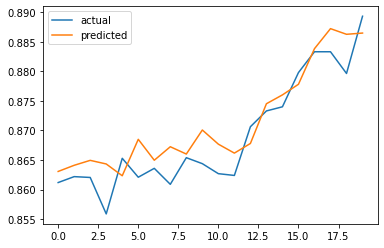

In [24]:
plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))

In [25]:
print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

n_past = 20 
mse with count 1.676750205330535e-05 
      
rmse with count 0.004094814043800445
      
meanabs with count 0.003458741307258606


trainX shape == (4600, 20, 4).
trainY shape == (4600, 1).
testX shape == (20, 20, 4).
testY shape == (20, 1).


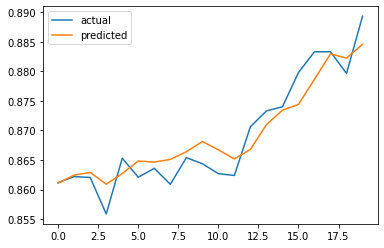

n_past = 20 
mse without count 9.915533432014456e-06 
      
rmse without count 0.003148894001393895
      
meanabs without count 0.002639499306678772


In [26]:


df2 = df.drop(["Date", "Adj Close", "count"],1)

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse without count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse without count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs without count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4600, 20, 5).
trainY shape == (4600, 1).
testX shape == (20, 20, 5).
testY shape == (20, 1).


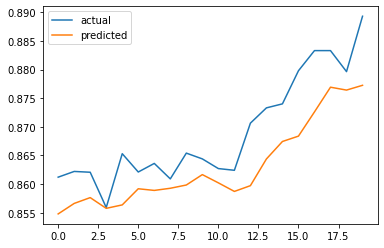

n_past = 20 
mse with count 4.735970139115864e-05 
      
rmse with count 0.006881838518241956
      
eanabs with count 0.0059743523597717285


In [27]:


df2 = df.drop(["Date", "Adj Close"],1)

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 20  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \neanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4560, 40, 4).
trainY shape == (4560, 1).
testX shape == (20, 40, 4).
testY shape == (20, 1).


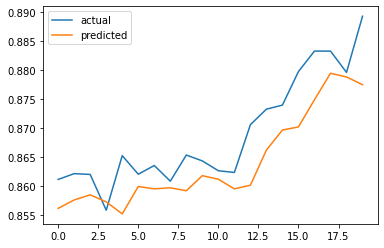

n_past = 40 
mse without count 3.6423538091590044e-05 
      
rmse without count 0.006035191636691419
      
meanabs without count 0.005039694905281067


In [28]:


df2 = df.drop(["Date", "Adj Close", "count"],1)

X_train = df2.iloc[:-60]
X_test = df2.iloc[-60:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 40  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse without count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse without count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs without count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4560, 40, 5).
trainY shape == (4560, 1).
testX shape == (20, 40, 5).
testY shape == (20, 1).


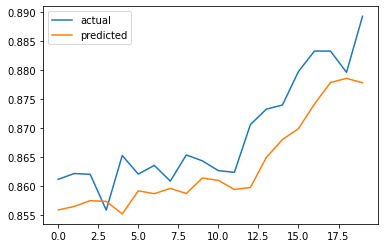

n_past = 40 
mse with count 4.2287163362786376e-05 
      
rmse with count 0.006502858091853641
      
meanabs with count 0.005613392591476441


In [29]:


df2 = df.drop(["Date", "Adj Close"],1)

X_train = df2.iloc[:-60]
X_test = df2.iloc[-60:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 40  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4560, 40, 5).
trainY shape == (4560, 1).
testX shape == (20, 40, 5).
testY shape == (20, 1).


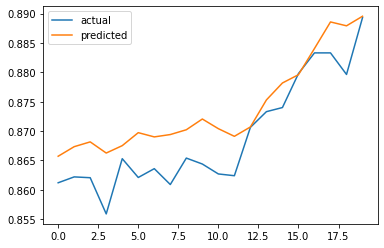

n_past = 40 
mse with count 3.3019117774912846e-05 
      
rmse with count 0.0057462263943315744
      
meanabs with count 0.0048852205276489254


In [30]:


df2 = df.drop(["Date", "Adj Close"],1)

X_train = df2.iloc[:-60]
X_test = df2.iloc[-60:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 40  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4400, 120, 5).
trainY shape == (4400, 1).
trainX shape == (20, 120, 5).
trainY shape == (20, 1).


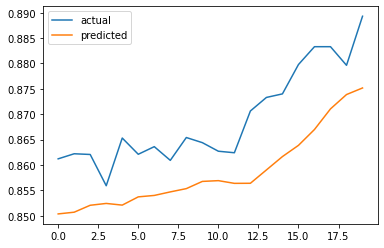

n_past = 120 
mse with count 0.00012157461170794192 
      
rmse with count 0.011026087778897006
      
meanabs with count 0.010406333208084106


In [33]:


df2 = df.drop(["Date", "Adj Close"],1)

X_train = df2.iloc[:-140]
X_test = df2.iloc[-140:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 120  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

es_callback = EarlyStopping(monitor="loss", patience=20)
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=200, batch_size=200, verbose=0, callbacks=[es_callback])

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4615, 5, 5).
trainY shape == (4615, 1).
trainX shape == (35, 5, 5).
trainY shape == (35, 1).


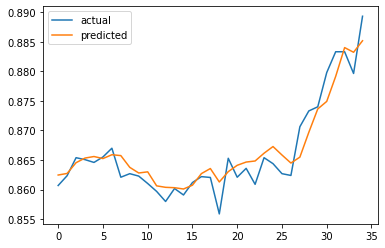

n_past = 5 
mse with count 6.419475304803817e-06 
      
rmse with count 0.00253366834941036
      
meanabs with count 0.001997922148023333


In [31]:


df2 = df.drop(["Date", "Adj Close"],1)

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

es_callback = EarlyStopping(monitor="loss", patience=12)
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

trainX shape == (4615, 5, 4).
trainY shape == (4615, 1).
testX shape == (35, 5, 4).
testY shape == (35, 1).


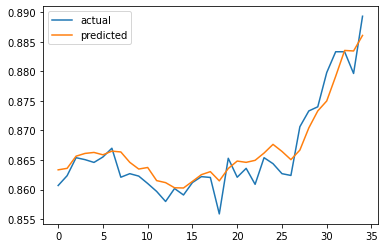

n_past = 5 
mse without count 6.876679883102302e-06 
      
rmse without count 0.0026223424419976695
      
meanabs without count 0.002141751561846052


In [32]:


df2 = df.drop(["Date", "Adj Close", "count"],1)

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

es_callback = EarlyStopping(monitor="loss", patience=12)
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse without count {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse without count {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs without count {meanabs(testY.flatten(), model.predict(testX).flatten())}""")

In [37]:
df["count1"]=df["count"].apply(lambda x: 1 if x > 0 else 0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4660 entries, 0 to 4661
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4660 non-null   float64
 1   Low     4660 non-null   float64
 2   Open    4660 non-null   float64
 3   Close   4660 non-null   float64
 4   count1  4660 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 218.4 KB
None
trainX shape == (4615, 5, 5).
trainY shape == (4615, 1).
trainX shape == (35, 5, 5).
trainY shape == (35, 1).


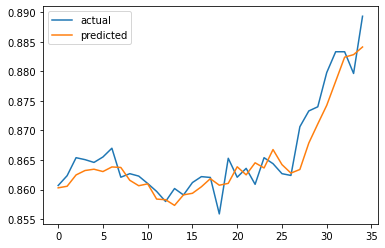

n_past = 5 
mse with count dummy 8.828353942850039e-06 
      
rmse with count dummy 0.0029712546075437627
      
meanabs with count dummy0.0023812362125941685


In [38]:
 

df2 = df.drop(["Date", "Adj Close", "count"],1)

print(df2.info())

X_train = df2.iloc[:-40]
X_test = df2.iloc[-40:]
scaler.fit(X_train)
scaled_train = scaler.transform(X_train)
scaled_test = scaler.transform(X_test)

trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 5  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_train) - n_future +1):
    trainX.append(scaled_train[i - n_past:i, 0:scaled_train.shape[1]])
    trainY.append(X_train[["Close"]].values[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

es_callback = EarlyStopping(monitor="loss", patience=12)
model = Sequential()
model.add(Bidirectional(LSTM(64,return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2]))))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

history = model.fit(trainX, trainY, epochs=150, batch_size=40, verbose=0)

testX = []
testY = []

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(scaled_test) - n_future +1):
    testX.append(scaled_test[i - n_past:i, 0:scaled_test.shape[1]])
    testY.append(X_test[["Close"]].values[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

plt.plot(testY.flatten())
plt.plot(model.predict(testX))
plt.legend(('actual', 'predicted'))
plt.show()

print(f"""n_past = {n_past} \nmse with count dummy {mse(testY.flatten(), model.predict(testX).flatten())} 
      \nrmse with count dummy {rmse(testY.flatten(), model.predict(testX).flatten())}
      \nmeanabs with count dummy{meanabs(testY.flatten(), model.predict(testX).flatten())}""")